# 2.3 Random Forest models with ClimateWins data

## Contents:

### 1. Importing Libraries and Data
- loading cleaned wx observations from 2.2, and pleasant_wx

### 2. Data Wrangling
- limit to 1 decade at a time to limit model runtime

### 3. Random Forest Model
- plot figures of at least two different trees
- record accuracy of the model

### 4. Create list of the feature importances
- reshape list
- collapse shape into one observation for each wx station

### 5. Bar Chart of Importances against list of Wx stations

### 6. Subset data - Every Year/ 1 Station
- run it for top 3 stations in order of importances

### 7. Random Forrest Model for each Station

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
# Setting Path 

path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Specialization - Machine Learning/Real World Applications of Machine Learning/ML Achievement 2 MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Specialization - Machine Learning/Real World Applications of Machine Learning/ML Achievement 2 MASTER FOLDER'

In [3]:
# delimiting columns displayed
pd.options.display.max_columns = None

In [4]:
pleasant = pd.read_csv (os.path.join(path, '02 Data', 'pleasant_wx_predictions.csv'), index_col = False)

In [5]:
X = pd.read_pickle(os.path.join(path, '02 Data', 'X_cleaned.pkl'))

In [6]:
pleasant.shape

(22950, 16)

In [7]:
X.shape

(22950, 135)

In [8]:
X.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

In [9]:
# Importing uncleaned/unstandardized data from previous lessons to get month/date back

unscaled = unscaled =  pd.read_csv (os.path.join(path, '02 Data', 'wx_unscaled.csv'), index_col = False)

### 2. Data Wrangling

- limit to 1 decade of information at a time when running with all wx stations.

In [10]:
#Reducing dataset to 1980's
dfdecade = unscaled[unscaled['DATE'].astype(str).str.contains('198')] #<-----INSERT YEAR HERE
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
7305,19800101,1,6,2.1,0.83,1.0180,0.40,0.01,8,1.6,-0.8,-4.4,1.2,5,0.88,1.0020,0.33,0.03,0.0,-0.6,-1.6,1.3,7,0.76,1.0003,0.48,0.00,0.3,0.3,-2.4,2.0,5,2.6,0.93,1.0072,0.29,0.58,2.3,0.9,-0.8,2.3,8,5.9,0.92,1.0078,0.12,0.45,0,0.0,0.5,0.0,1.9,6,0.90,0.00,7,-1.2,-3.4,0.2,4,0.90,1.0140,0.14,0.00,0,0.1,-1.8,-4.6,2.3,3.2,0.92,1.0048,0.20,0.11,0.4,-1.6,-3.4,1.3,3,1.4,0.79,1.0051,1.04,0.00,4.7,-1.7,-5.7,2.8,6,5.1,0.93,1.0090,0.27,0.11,0.7,-0.1,-1.1,1.4,4,4.4,0.63,1.0195,1.11,0.00,8.2,12.5,9.7,15.3,5,0.81,0.53,0.01,8,3.7,-2.6,-3.6,-0.2,5,6.0,0.64,1.0038,0.14,0.00,15,3.3,-3.7,-4.6,-3.1,3,2.8,0.73,1.0152,7.1,4.5,7,4.5,0.86,1.0276,0.60,0.62,0.0,-19.7,-21.2,-18.2,6,1.0015,0.13,0.20,1.9,-0.9,-2.5,1.1,2.4,0.84,1.0124,0.49,0.27,3.2,0.7,5.6,6,0.90,1.0130,0.17,0.05,0,0.0,4.4,2.1,6.0
730

In [11]:
#Reducing pleasant dataset to 1980's
pleasant_nineties = pleasant[pleasant['DATE'].astype(str).str.contains('198')] #<-----INSERT YEAR HERE
pleasant_nineties

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
7305,19800101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7306,19800102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7307,19800103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7308,19800104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7309,19800105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,19891227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10954,19891228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10955,19891229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10956,19891230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# dropping all columns regarding Gdansk, Roma, Tours from dfdecade, as they aren't included in pleasant_wx


columns_to_drop = ['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 
                   'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 
                   'GDANSK_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 
                   'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',
                   'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure',
                   'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 
                   'TOURS_temp_min', 'TOURS_temp_max']

# Using the drop() method to drop the specified columns
dfdecade.drop(columns=columns_to_drop, inplace=True)

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_15271/3115691780.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdecade.drop(columns=columns_to_drop, inplace=True)


In [13]:
dfdecade.shape

(3653, 149)

In [14]:
further_drops = ['BASEL_snow_depth',  'DUSSELDORF_snow_depth', 'HEATHROW_snow_depth',
                  'MUNCHENB_snow_depth', 'OSLO_snow_depth',  'VALENTIA_snow_depth',
                 'BASEL_wind_speed', 'DEBILT_wind_speed', 'DUSSELDORF_wind_speed',
                  'KASSEL_wind_speed', 'LJUBLJANA_wind_speed',  'MAASTRICHT_wind_speed',
                  'MADRID_wind_speed', 'OSLO_wind_speed','SONNBLICK_wind_speed',]

dfdecade.drop(columns=further_drops, inplace=True)

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_15271/2925106035.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdecade.drop(columns=further_drops, inplace=True)


In [15]:
dfdecade.drop(columns = ['DATE', 'MONTH'], inplace = True)

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_15271/695057663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdecade.drop(columns = ['DATE', 'MONTH'], inplace = True)


In [16]:
# Inserting "dummy values" for the 3 that are still missing

# missing 'Kassel_cloud_cover', with 'Ljubjana_cloud_cover'
# missing 'Munchenb_pressure' with 'Sonnblick_pressure'
# missing 'Stockholm_humidity' with Oslo_humidity'

dfdecade.columns.get_loc('HEATHROW_temp_max')

53

In [17]:
dfdecade.columns.get_loc('MUNCHENB_humidity')

90

In [18]:
dfdecade.columns.get_loc('STOCKHOLM_cloud_cover')

115

In [19]:
dfdecade.insert(54,'KASSEL_cloud_cover', unscaled['LJUBLJANA_cloud_cover'])
dfdecade.insert(92,'MUNCHENB_pressure',unscaled['SONNBLICK_pressure'])
dfdecade.insert(118, 'STOCKHOLM_humidity', unscaled['OSLO_humidity'])
dfdecade.columns.tolist()

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',


In [20]:
dfdecade.shape

(3653, 135)

In [21]:
pleasant_nineties.shape

(3653, 16)

In [22]:
# turning dfdecade and pleasant_nineties from a df to arrays (X and y)

X = np.array(dfdecade)
y = np.array(pleasant_nineties)

In [23]:
# verifying array shape

X.shape

(3653, 135)

In [24]:
y = np.argmax( y, axis = 1)
y

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.20, random_state = 21)

In [34]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922,)
(731, 135) (731,)


In [35]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

### 3. Random Forest Model

In [31]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) #, max_depth = 5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


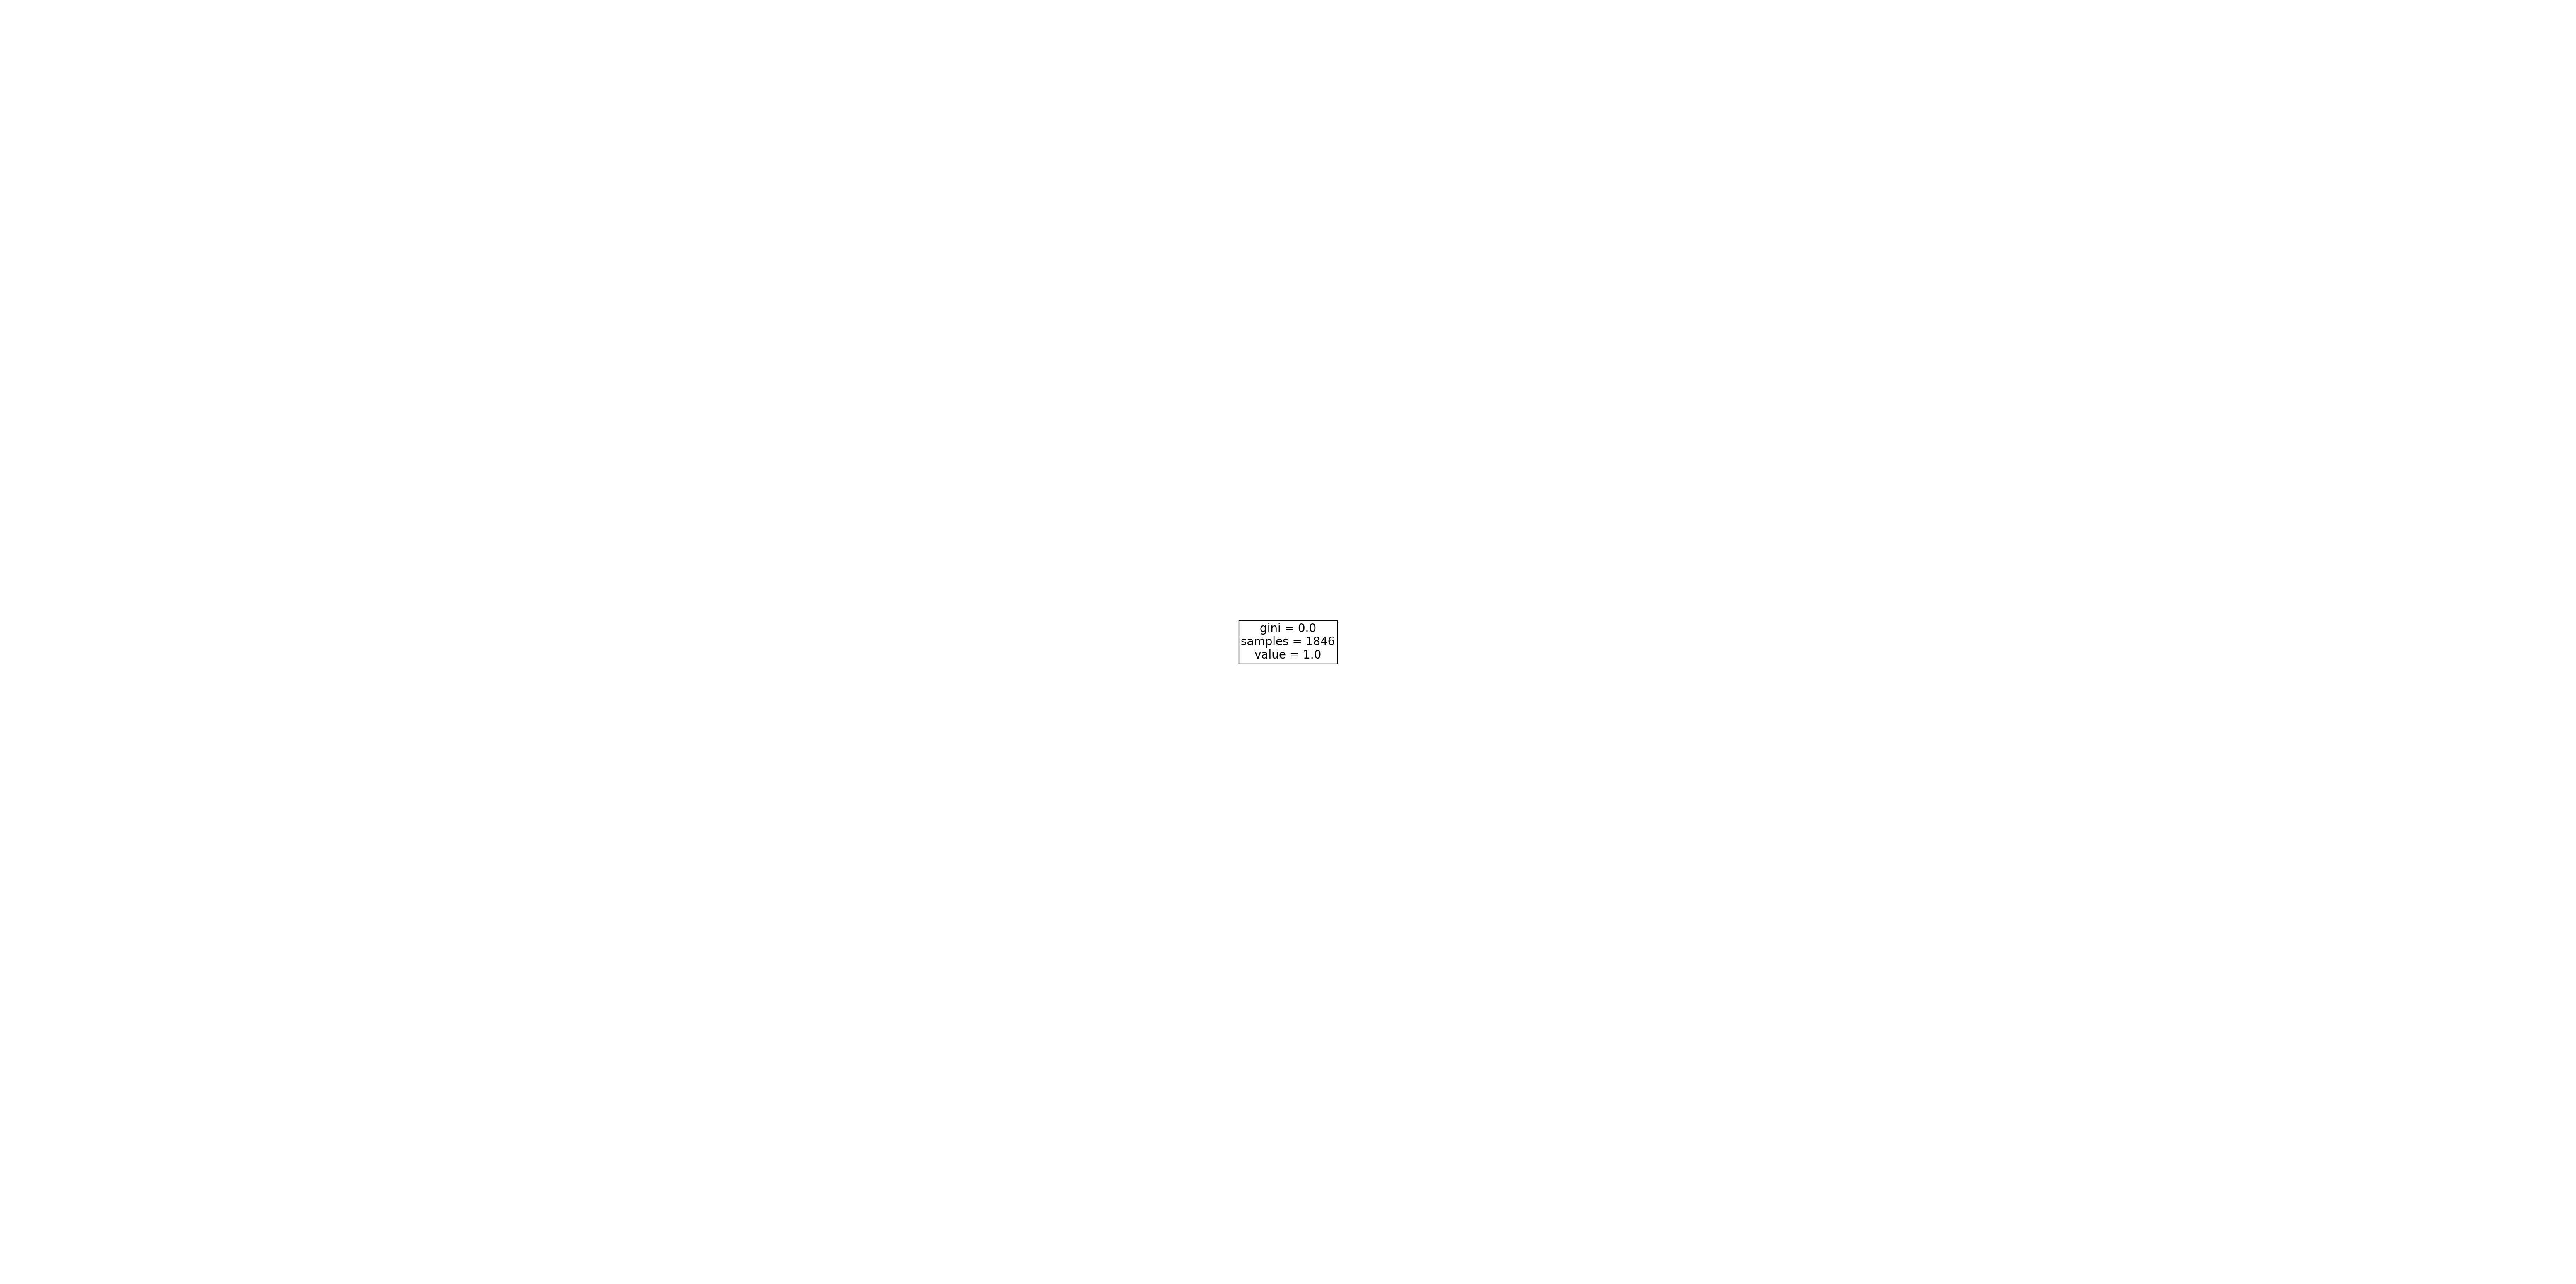

In [37]:
#types = {0:'Unpleasant Wx', 1:'Pleasant Wx'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);